<a href="https://colab.research.google.com/github/kaiserlp/ATOC4500_Kaiser-Borchlewicz_FinalProject/blob/main/ATOC4500_project_Kaiser_Borchlewicz_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**ATOC4500 Data Science Lab: Final Project**
###**Denver Weather Forecasting in Accordance with Grand Junction Local Weather Data**
###Author: Ania Borchlewicz (anbo1529@colorado.edu), Laura Kaiser (laka4851@colorado.edu)###
###Last updated: May 1st, 2022###

**>>>> This code is available on github at https://github.com/kaiserlp/ATOC4500_Kaiser-Borchlewicz_FinalProject**

**>>>> NOTE: Please run this and other notebooks using a Chrome browser**

###**Introduction:** Using a significance level of 95%, we predict that there will be a positive correlation between the weather in Grand Junction to the weather in Denver. By analyzing the data sets, we hope to gain a better understanding of the correlation between the weather in the Eastern Part of Colorado compared to the weather seen further West. At the end of the project, we expect to see that the weather in Grand Junction will affect the weather in Denver since the weather moves from East to West. 

The data sets we are using are the Local Climatological Data (LCD) data sets from Grand Junction and Denver, Colorado. The data has been collected at seemingly random intervals. The data sets have already been pre-processed, however, there are duplicates in the data sets. The data is surface observations taken at weather stations at Grand Junction and Denver. The data we are using is a part of a larger collection of weather data taken from thousands of locations worldwide, however since this class is taking place in Colorado, we picked two locations in the state. 

There are some limitations to the data. While analyzing and munging the data, we encountered a few problems. The data sets are inconsistent with the amount of data collected in a day. According to the description of the data sets, there was supposed to be a data collection every hour during the day. However, we found that on some days the data collection only happened once a day and it was mostly taken right before midnight. This can affect the analysis of our data since variables like temperature and relative humidity are evidently different at night compared to during the day.


  





###**Step 1: Read in data**



The datasets have data collected from Grand Junction and Denver Colorado at weather stations. We are using variables such as temperature (F), dewpoint temperature (F), inches of precipitation, relative humidity, pressure (mbar), wind direction, wind speed (mph), and wind gusts (mph). The variables collected from the Grand Junction weather station are being used to predict the same variables in Denver. 

In [ ]:
import datetime
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from random import randint
#from scipy.stats import norm
import scipy.stats as stats
from scipy import integrate

from google.colab import files

import re

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving LCD_Denver_2002-2021_daily.csv to LCD_Denver_2002-2021_daily.csv
User uploaded file "LCD_Denver_2002-2021_daily.csv" with length 721265 bytes


In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving LCD_GrandJunction_2002-2021_daily.csv to LCD_GrandJunction_2002-2021_daily.csv
User uploaded file "LCD_GrandJunction_2002-2021_daily.csv" with length 702151 bytes


In [ ]:
den_df = pd.read_csv('LCD_Denver_2002-2021_daily.csv')
jun_df = pd.read_csv('LCD_GrandJunction_2002-2021_daily.csv')

In [ ]:
den_df

date  points  min_dry  max_dry  min_dew  max_dew  precip     avg_rh  \
0     20020101      47      8.0     23.0     -3.0     19.0       0  85.872340   
1     20020102      29      1.0     35.0     -2.0     12.0       0  56.517241   
2     20020103      28     27.0     52.0     -1.0     21.0       0  36.535714   
3     20020104      37     22.0     36.0     14.0     31.0       0  73.648649   
4     20020105      30     20.0     40.0      8.0     17.0       0  50.433333   
...        ...     ...      ...      ...      ...      ...     ...        ...   
7296  20211227      73     23.0     43.0     12.0     18.0       1  45.410959   
7297  20211228      73     21.0     37.0      1.0     18.0       1  38.383562   
7298  20211229      73     14.0     34.0      1.0      9.0       1  44.712329   
7299  20211230      70     16.0     45.0      5.0     16.0       1  32.842857   
7300  20211231      73     14.0     43.0     12.0     30.0       1  73.794521   

        avg_pres  avg_wind_spd  avg_wind_gust  
0     839.320080      6.553191      26.000000  
1     834.779846      8.517241      26.000000  
2     830.402961     12.714286      26.000000  
3     833.875341     11.621622      24.702703  
4     836.291272      8.666667      24.000000  
...          ...           ...            ...  
7296  823.588303      4.136986      16.109589  
7297  820.809620      6.534247      17.657534  
7298  825.142338      2.780822      18.000000  
7299  820.754218     19.014286      37.600000  
7300  823.263596      7.068493      18.547945  

[7301 rows x 11 columns]

In [ ]:
jun_df

date  points  min_dry  max_dry  min_dew  max_dew  precip     avg_rh  \
0     20020101      52     23.0     39.0     16.0     31.0       1  88.653846   
1     20020102      29     17.0     35.0     12.0     21.0       0  72.241379   
2     20020103      29     19.0     33.0     10.0     22.0       0  66.275862   
3     20020104      44     21.0     33.0     20.0     28.0       1  93.022727   
4     20020105      38     17.0     31.0     15.0     25.0       0  89.184211   
...        ...     ...      ...      ...      ...      ...     ...        ...   
7296  20211227      29     30.0     41.0     20.0     28.0       0  66.275862   
7297  20211228      76     24.0     33.0     23.0     29.0       1  91.631579   
7298  20211229      52     19.0     30.0     17.0     27.0       1  91.826923   
7299  20211230      32     21.0     35.0     19.0     29.0       0  85.031250   
7300  20211231      89     24.0     34.0     22.0     32.0       1  94.674157   

        avg_pres  avg_wind_spd  avg_wind_gust  
0     859.380862      3.442308      21.000000  
1     861.800917      5.137931      21.000000  
2     859.231926      4.620690      21.000000  
3     859.927274      4.909091      21.000000  
4     865.427268      3.052632      21.000000  
...          ...           ...            ...  
7296  840.314857      9.517241      23.586207  
7297  838.777308      4.934211      18.000000  
7298  842.370714      2.576923      18.000000  
7299  843.030906      2.562500      18.000000  
7300  836.734794      4.370787      18.000000  

[7301 rows x 11 columns]

###**Step 2: Munge data**

&emsp;The data we were given was pre-munged by professor Jennifer Kay. All of the empty values were removed and replaced with the next valid observation. However, the dataset didn't have the same number of entries for each day (some days only had one measurement while others had upwards of 70), and there were also some repeat values. Because of this, we decided to create two new datasets made up of daily highs, lows, and averages. After doing this, we also discovered that one of our datasets (Denver) was missing several values, and therefore the datasets weren't the same size. To fix this, we had to identify the missing days and remove them from the Grand Junction dataset to make our datasets the same size and ensure that those additional values wouldn't impact our predictions. This entire process is layed out in the partner notebook, "Dataset Tomfoolery", which should also be in the repo.

&emsp;Following all of that, we then had to scale our data and divide it into training and test sets. All of that is accomplished in the code cell below, using code that was provided to us by Prof. Kay.

In [ ]:
# Network of functions for scaling the data and dividing it into train/test datasets
def define_holdout_data(x, y, verbose):
    """Perform a 80/20 test-train split (80% of data is training, 20% is testing). Split is randomized with each call."""
    random_state = randint(0,1000)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=random_state)
    if verbose==True:
        print("Prior to scaling and rebalacing...")
        print("Shape of training predictors: "+str(np.shape(x_train)))
        print("Shape of testing predictors: "+str(np.shape(x_test)))
        print("Shape of training predictands: "+str(np.shape(y_train)))
        print("Shape of testing predictands: "+str(np.shape(y_test)))
        print(" ")
    return x_train, x_test, y_train, y_test

def scale_data(x_train, x_test):
    """
    Scale training data so that model reaches optimized weights much faster. 
    
    *All data that enters the model should use the same scaling used to scale the training data.*
    Thus, we also perform scaling on testing data for validation later. 
    Additionally, we return the scaler used to scale any other future input data.
    """
    
    scaler = preprocessing.MinMaxScaler() # normalize 
    x_train_scaled = pd.DataFrame(data=scaler.fit_transform(x_train),index=x_train.index,columns=x_train.columns) 
    x_test_scaled = pd.DataFrame(data=scaler.transform(x_test),index=x_test.index,columns=x_test.columns)
    
    return scaler, x_train_scaled, x_test_scaled

def balance_data(x,y,verbose):
    """Resample data ensure model is not biased towards a particular outcome of precip or no precip."""
    # Combine again to one dataframe to ensure both the predictor and predictand are resampled from the same 
    # observations based on predictand outcomes. 
    dataset = pd.concat([x, y],axis=1)

    # Separating classes
    raining = dataset[dataset['precip'] == 1]
    not_raining = dataset[dataset['precip'] == 0]

    random_state = randint(0,1000)
    oversample = resample(raining, 
                           replace=True, 
                           n_samples=len(not_raining), #set the number of samples to equal the number of the majority class
                           random_state=random_state)

    # Returning to new training set
    oversample_dataset = pd.concat([not_raining, oversample])

    # reseparate oversampled data into X and y sets
    x_bal = oversample_dataset.drop(['precip'], axis=1)
    y_bal = oversample_dataset['precip']

    if verbose==True:
        print("After scaling and rebalacing...")
        print("Shape of predictors: "+str(np.shape(x_bal)))
        print("Shape of predictands: "+str(np.shape(y_bal)))
        print(" ")
    
    return x_bal, y_bal

def dataprep_pipeline(x, y, verbose):
    """ Combines all the functions defined above so that the user only has to 
    call one function to do all data pre-processing. """
    # verbose=True prints the shapes of input & output data

    # split into training & testing data
    x_train, x_test, y_train, y_test = define_holdout_data(x, y, verbose) 
    print("Split achieved")

    # perform feature scaling
    scaler, x_train_scaled, x_test_scaled = scale_data(x_train, x_test)
    scaler2, y_train_scaled, y_test_scaled = scale_data(y_train, y_test)
    print("Scaling achieved")

    # rebalance according to outcomes (i.e., the number of precipitating 
    # observations & non-precipitating outcomes should be equal)
    #if verbose==True:
    #    print("for training data... ")
    #x_train_bal, y_train_bal = balance_data(x_train_scaled, y_train, verbose)
    #if verbose==True:
    #    print("for testing data... ")
    #x_test_bal, y_test_bal = balance_data(x_test_scaled, y_test, verbose)
    
    return x_train_scaled, y_train_scaled, x_test_scaled, y_test_scaled

In [ ]:
den_train, jun_train, den_test, jun_test = dataprep_pipeline(den_df[['min_dry', 'max_dry', 'min_dew', 'max_dew', 'precip', 'avg_rh', 'avg_pres', 'avg_wind_spd', 'avg_wind_gust']], jun_df[['min_dry', 'max_dry', 'min_dew', 'max_dew', 'precip', 'avg_rh', 'avg_pres', 'avg_wind_spd', 'avg_wind_gust']], True)

Prior to scaling and rebalacing...
Shape of training predictors: (5840, 9)
Shape of testing predictors: (1461, 9)
Shape of training predictands: (5840, 9)
Shape of testing predictands: (1461, 9)
 
Split achieved
Scaling achieved


In [ ]:
den_train

min_dry   max_dry   min_dew   max_dew  precip    avg_rh  avg_pres  \
4916     0.79  0.877358  0.670732  0.857143     1.0  0.328708  0.620996   
1616     0.78  0.896226  0.646341  0.753247     0.0  0.252311  0.525068   
3737     0.61  0.764151  0.182927  0.649351     1.0  0.247050  0.803353   
4703     0.43  0.443396  0.500000  0.506494     1.0  0.559290  0.611237   
5001     0.77  0.867925  0.560976  0.701299     1.0  0.138125  0.540113   
...       ...       ...       ...       ...     ...       ...       ...   
1260     0.58  0.735849  0.743902  0.753247     0.0  0.541206  0.619150   
5976     0.70  0.764151  0.585366  0.740260     1.0  0.302491  0.521533   
4009     0.23  0.198113  0.292683  0.376623     1.0  0.780781  0.803353   
3718     0.46  0.452830  0.451220  0.506494     1.0  0.809037  0.803353   
3717     0.57  0.698113  0.170732  0.298701     1.0  0.050855  0.803353   

      avg_wind_spd  avg_wind_gust  
4916      0.100450       0.153846  
1616      0.376788       0.247086  
3737      0.411201       0.539530  
4703      0.063338       0.179487  
5001      0.139582       0.179487  
...            ...            ...  
1260      0.331444       0.080808  
5976      0.121524       0.495258  
4009      0.090058       0.179487  
3718      0.188875       0.171760  
3717      0.236160       0.145788  

[5840 rows x 9 columns]

In [ ]:
jun_train

min_dry   max_dry  min_dew   max_dew  precip    avg_rh  avg_pres  \
4916  0.840426  0.927835   0.4875  0.623377     0.0  0.107911  0.473725   
1616  0.819149  0.896907   0.4750  0.519481     0.0  0.076104  0.468378   
3737  0.553191  0.577320   0.2625  0.402597     0.0  0.124924  0.405235   
4703  0.393617  0.340206   0.4125  0.428571     0.0  0.469259  0.562329   
5001  0.776596  0.721649   0.6250  0.831169     0.0  0.422070  0.450099   
...        ...       ...      ...       ...     ...       ...       ...   
1260  0.670213  0.742268   0.5625  0.675325     0.0  0.282065  0.534814   
5976  0.723404  0.742268   0.3500  0.519481     0.0  0.088309  0.391087   
4009  0.255319  0.154639   0.3500  0.415584     0.0  0.877578  0.541196   
3718  0.531915  0.422680   0.4000  0.532468     0.0  0.380327  0.350937   
3717  0.563830  0.567010   0.3375  0.428571     0.0  0.214873  0.244152   

      avg_wind_spd  avg_wind_gust  
4916      0.348511       0.264420  
1616      0.340743       0.171821  
3737      0.649915       0.389942  
4703      0.118574       0.328210  
5001      0.461104       0.401048  
...            ...            ...  
1260      0.324656       0.298373  
5976      0.298640       0.203888  
4009      0.179166       0.596745  
3718      0.426393       0.303185  
3717      0.624540       0.349096  

[5840 rows x 9 columns]

###**Step 3: Apply Data Science Method(s)**

In order to analyze our data, we are using an algorithm called random foresting. This is a form of machine learning where decision trees are used to calculate if the weather in Grand Junction can be used to determine the weather in Denver. We are able to choose the number of data trees used and how many of the decisions are available in each tree. Each decision tree will provide an answer as to whether or not there is a positive correlation between the weather at the two locations. In order to get an overall accurate prediction from each decision tree, each tree provides a class prediction. For our project, the class prediction will be whether there is a positive correlation between the weather data collected in Grand Junction compared to the weather data collected in Denver. Therefore, if the majority of the decision trees say there is a positive correlation, then we can determine that overall there is a positive correlation and if the majority of the decision trees say there is a negative correlation, then there is a negative correlation. We are displaying the prediction as a new data set called "den_test". This new dataset is a daily prediction based off of the Grand Junction dataset.
 
The use of random forests is helpful in preventing errors since each decision tree has a low correlation in comparison to another decision tree. Since our trees are well informed of the data sets being used and have a low correlation in relation to each other, the overall final result given by the trees should be an accurate representation. We are assuming that we have compressed the data enough to get consistent daily readings before we feed it into the algorithm. Since the data sets are inconsistent when the data was collected and there is missing data that was replaced by the next value of usable data, there is a chance that the final result could be skewed. 


In [ ]:
## add code cells here to apply your data science method

# Train the algorithm using 50 trees, each of which have a depth of 20
forest = RandomForestRegressor(n_estimators = 50, max_depth = 20)
forest.fit(jun_train, den_train)

RandomForestRegressor(max_depth=20, n_estimators=50)

In [ ]:
# Test our algorithm and check its accuracy
predict = forest.predict(jun_test)

print(type(predict))

# Convert predict (currently an array) to a pandas dataframe to make comparing to our test set easier
predict_df = pd.DataFrame(predict, columns = ['min_dry', 'max_dry', 'min_dew', 'max_dew', 'precip', 'avg_rh', 'avg_pres', 'avg_wind_spd', 'avg_wind_gust'])
predict_df

<class 'numpy.ndarray'>


min_dry   max_dry   min_dew   max_dew    precip    avg_rh  avg_pres  \
0     0.783975  0.835166  0.809632  0.888661  0.819216  0.477633  0.750967   
1     0.384808  0.451141  0.340006  0.393102  0.860000  0.422026  0.699490   
2     0.723983  0.768227  0.768121  0.815744  0.632653  0.532869  0.669974   
3     0.486000  0.459434  0.599878  0.609740  0.960000  0.807206  0.563567   
4     0.398600  0.468679  0.404146  0.452727  0.520000  0.514593  0.717031   
...        ...       ...       ...       ...       ...       ...       ...   
1456  0.551400  0.546368  0.609573  0.653247  0.860000  0.653776  0.478075   
1457  0.529800  0.552830  0.578537  0.591429  0.780000  0.561031  0.651443   
1458  0.796581  0.875778  0.741865  0.828692  0.478182  0.338284  0.629273   
1459  0.411050  0.425364  0.372622  0.445969  0.780000  0.512642  0.486445   
1460  0.445248  0.439435  0.431082  0.480058  0.940000  0.544973  0.469518   

      avg_wind_spd  avg_wind_gust  
0         0.211487       0.230434  
1         0.175664       0.223367  
2         0.289510       0.259797  
3         0.185663       0.156642  
4         0.214230       0.130406  
...            ...            ...  
1456      0.293432       0.284795  
1457      0.300431       0.200092  
1458      0.293623       0.187894  
1459      0.244199       0.230466  
1460      0.264980       0.206857  

[1461 rows x 9 columns]

In [ ]:
den_test

min_dry   max_dry   min_dew   max_dew  precip    avg_rh  avg_pres  \
1659     0.88  0.933962  0.695122  0.779221     0.0  0.226529  0.638461   
5121     0.36  0.471698  0.231707  0.389610     1.0  0.376885  0.671947   
1344     0.75  0.745283  0.804878  0.818182     0.0  0.458774  0.720208   
4685     0.61  0.679245  0.536585  0.584416     1.0  0.423374  0.485271   
3656     0.59  0.660377  0.390244  0.441558     1.0  0.150091  0.803353   
...       ...       ...       ...       ...     ...       ...       ...   
4880     0.61  0.613208  0.670732  0.727273     1.0  0.588487  0.432332   
677      0.49  0.547170  0.585366  0.545455     1.0  0.593398  0.583319   
7121     0.79  0.830189  0.829268  0.857143     1.0  0.431144  0.713256   
1102     0.25  0.273585  0.280488  0.311688     0.0  0.639708  0.391372   
5485     0.52  0.490566  0.451220  0.441558     1.0  0.319012  0.404257   

      avg_wind_spd  avg_wind_gust  
1659      0.437247       0.165501  
5121      0.254341       0.253561  
1344      0.323791       0.118401  
4685      0.130309       0.151036  
3656      0.225146       0.111111  
...            ...            ...  
4880      0.191803       0.108887  
677       0.232193       0.128205  
7121      0.148855       0.206533  
1102      0.389744       0.384615  
5485      0.519568       0.414530  

[1461 rows x 9 columns]

###**Step 4: Present results visually using 2-3 graphs**

In [ ]:
# Randomly selecting our test and training datasets made the indexes a little screwy
# We'll be resetting them here for ease of itteration
den_test_reindex = den_test.reset_index(drop=True)
den_test_reindex

min_dry   max_dry   min_dew   max_dew  precip    avg_rh  avg_pres  \
0        0.88  0.933962  0.695122  0.779221     0.0  0.226529  0.638461   
1        0.36  0.471698  0.231707  0.389610     1.0  0.376885  0.671947   
2        0.75  0.745283  0.804878  0.818182     0.0  0.458774  0.720208   
3        0.61  0.679245  0.536585  0.584416     1.0  0.423374  0.485271   
4        0.59  0.660377  0.390244  0.441558     1.0  0.150091  0.803353   
...       ...       ...       ...       ...     ...       ...       ...   
1456     0.61  0.613208  0.670732  0.727273     1.0  0.588487  0.432332   
1457     0.49  0.547170  0.585366  0.545455     1.0  0.593398  0.583319   
1458     0.79  0.830189  0.829268  0.857143     1.0  0.431144  0.713256   
1459     0.25  0.273585  0.280488  0.311688     0.0  0.639708  0.391372   
1460     0.52  0.490566  0.451220  0.441558     1.0  0.319012  0.404257   

      avg_wind_spd  avg_wind_gust  
0         0.437247       0.165501  
1         0.254341       0.253561  
2         0.323791       0.118401  
3         0.130309       0.151036  
4         0.225146       0.111111  
...            ...            ...  
1456      0.191803       0.108887  
1457      0.232193       0.128205  
1458      0.148855       0.206533  
1459      0.389744       0.384615  
1460      0.519568       0.414530  

[1461 rows x 9 columns]

<function matplotlib.pyplot.show>

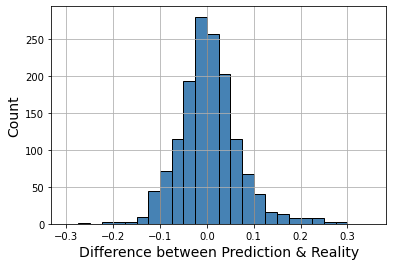

In [ ]:
# Select a column and compare the values from den_test and predict_df to see how close the prediction got
diff = []
bins = np.linspace(-0.3, 0.35, 27)

for i in range(1460):
  diff.append(predict_df.min_dry[i] - den_test_reindex.min_dry[i])

plt.hist(diff, bins=bins, color='steelblue', ec='black')
plt.xlabel("Difference between Prediction & Reality",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.grid()
plt.show

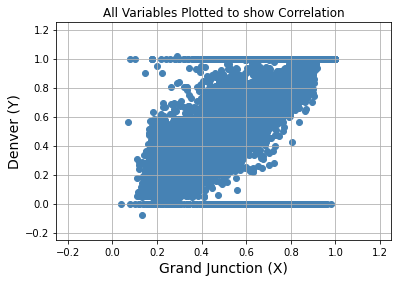

In [ ]:
## Start by making a scatter plot with the independent variable (y-axis) and dependent variable(x-axis)
x=predict_df ### EDIT THIS CELL (x, dependent variable)
y=den_test ### EDIT THIS CELL (y, independent variable)

fig = plt.figure(figsize=(6,4));
plt.scatter(x,y,c='steelblue');
plt.title("All Variables Plotted to show Correlation")
plt.xlabel("Grand Junction (X)",fontsize=14);
plt.ylabel("Denver (Y)",fontsize=14);
plt.xlim((-0.25,1.25));
plt.ylim((-0.25,1.25));
plt.grid();

###**Summary**: At the beginning of the project, we predicted that there would be a positive correlation between the weather in Grand Junction to the weather in Denver. We aimed to use random forests to gain a better understanding of the correlation between the weather in Eastern Colorado compared to weather seen further west. This is relevant to not only our group but to the rest of the class since we are all currently residing in Boulder, Colorado. The results can give us insight into where our weather comes from and how the weather is predicted.

  After the use of random forests to create a prediction, we have found that there is a positive correlation between the weather observed in Grand Junction and the weather observed in Denver. This finding matches our hypothesis where we predicted this positive correlation. After graphing the correlation between Grand Junction and Denver, the graph shows an overall positive slope. The bars on the top and bottom of the graph are due to if there was precipitation on that day or not. We assigned a value of 0 to represent if there was no precipitation on that day and a value of 1 if there was precipitation. 

  Overall, learning about the use of random forests to predict weather correlation between two locations was thought-provoking. If we had more time, we would like to be able to choose new data sets with locations or variables. It could be interesting to look at weather patterns across an entire country or even how ocean currents can impact local weather patterns. 


**Revision Summary**: One suggestion was adding a title on the scatter plot that explains that every variable is being displayed on the graph. This is a great suggestion since we originally did not have a title on the graph which would make it confusing for anyone viewing the notebook. Now the scatter plot has a title and labels on both axes. Another suggestion was to explain what the prediction would look like when explaining the random forest regression. We think this is also a good suggestion since an important part of the project is the data science method we chose. Both of these suggestions have been updated in the notebook.



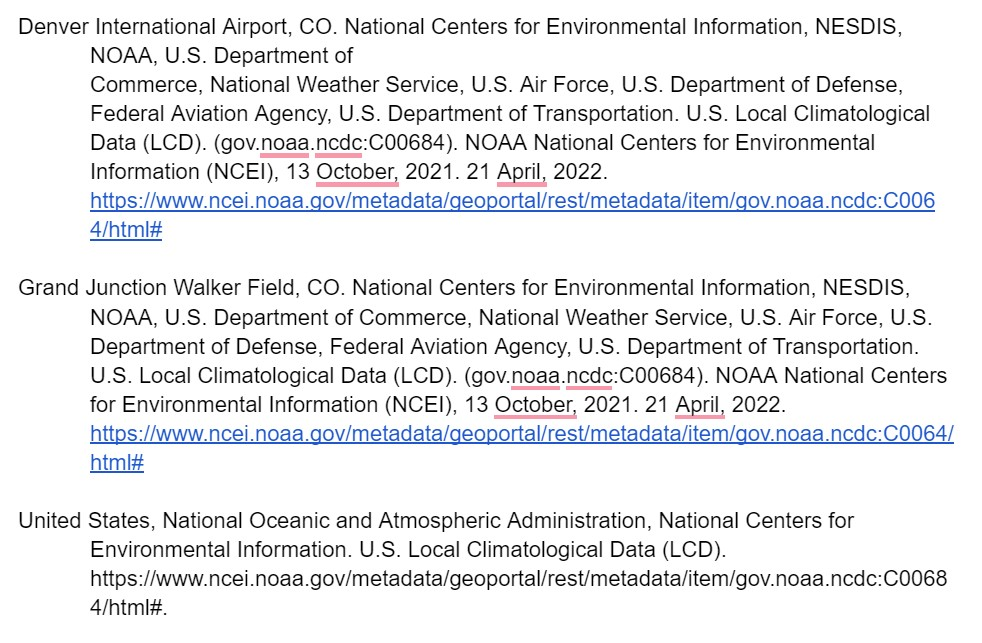